In [10]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [12]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [13]:
from citipy import citipy

In [14]:
# Create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

587

In [15]:
# Import the request library
import requests
# Import the API key
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [16]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into the city_data list
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avera
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | kapaa
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | monroe
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | kitui
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | sioux lookout
Processing Record 11 of Set 1 | tuatapere
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | airai
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | cornesti
Processing Record 17 of Set 1 | barrow
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | bandarbeyla
Processing Record 20 of Set 1 | kaitangata
Processing Record 21 of Set 1 | lagoa
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | attawapiskat
City not found

In [21]:
len(city_data)

538

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avera,33.1940,-82.5271,72.91,91,100,10.27,US,2022-04-06 16:22:06
1,Cape Town,-33.9258,18.4232,63.27,60,40,11.50,ZA,2022-04-06 16:20:27
2,Kapaa,22.0752,-159.3190,67.98,97,20,5.75,US,2022-04-06 16:22:08
3,Butaritari,3.0707,172.7902,81.54,73,100,20.56,KI,2022-04-06 16:22:08
4,Monroe,43.1501,-77.6831,60.42,66,75,9.22,US,2022-04-06 16:17:49
5,Yellowknife,62.4560,-114.3525,19.92,86,75,4.61,CA,2022-04-06 16:22:05
6,Vaini,-21.2000,-175.2000,73.56,100,75,0.00,TO,2022-04-06 16:22:09
7,Kitui,-1.3670,38.0106,73.42,54,1,6.80,KE,2022-04-06 16:22:09
8,Thompson,55.7435,-97.8558,28.56,80,100,9.22,CA,2022-04-06 16:22:05
9,Sioux Lookout,50.1001,-91.9170,33.87,93,100,10.36,CA,2022-04-06 16:22:10


In [24]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avera,US,2022-04-06 16:22:06,33.1940,-82.5271,72.91,91,100,10.27
1,Cape Town,ZA,2022-04-06 16:20:27,-33.9258,18.4232,63.27,60,40,11.50
2,Kapaa,US,2022-04-06 16:22:08,22.0752,-159.3190,67.98,97,20,5.75
3,Butaritari,KI,2022-04-06 16:22:08,3.0707,172.7902,81.54,73,100,20.56
4,Monroe,US,2022-04-06 16:17:49,43.1501,-77.6831,60.42,66,75,9.22
5,Yellowknife,CA,2022-04-06 16:22:05,62.4560,-114.3525,19.92,86,75,4.61
6,Vaini,TO,2022-04-06 16:22:09,-21.2000,-175.2000,73.56,100,75,0.00
7,Kitui,KE,2022-04-06 16:22:09,-1.3670,38.0106,73.42,54,1,6.80
8,Thompson,CA,2022-04-06 16:22:05,55.7435,-97.8558,28.56,80,100,9.22
9,Sioux Lookout,CA,2022-04-06 16:22:10,50.1001,-91.9170,33.87,93,100,10.36


In [26]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

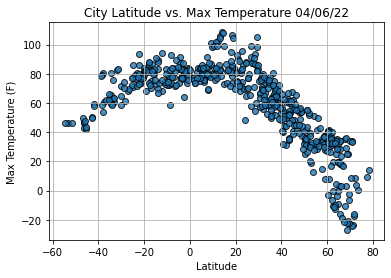

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show plot
plt.show()

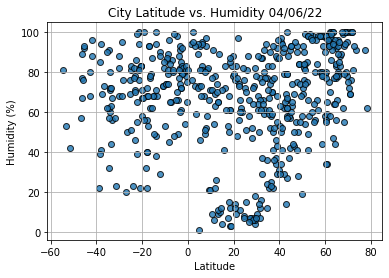

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

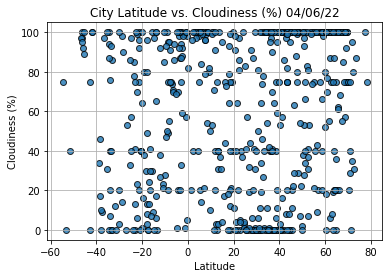

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("weather_data/Fig3.png")
# Show plot
plt.show()

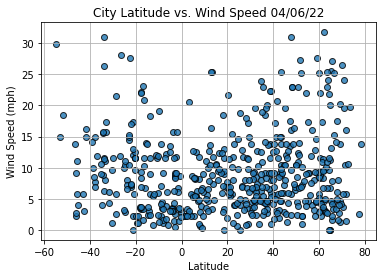

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()